In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercício 1

In [2]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def compute_statistics(g, g_type):
    avg_deg = len(g)/g.number_of_edges()
    second_m = moment_of_degree_distribution(g, 2)
    short = nx.average_shortest_path_length(g)
    clust = nx.average_clustering(g)
    transit = nx.transitivity(g)
    assort = nx.degree_assortativity_coefficient(g)
    return [len(g), avg_deg, second_m, short, clust, transit, assort, g_type]

In [3]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])

k = 10
n = 500
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

n = 500
p = 0.01
k = 10
for i in range(10, 15):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')
    
n = 500
p = 0.1
k = 10
for i in range(15, 20):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')

n = 500
p = 0.1
k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')
    
net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,500,0.195618,115.796,2.918549,0.022216,0.022961,0.003970,Erdos-Renyi
1,500,0.198728,110.868,2.927840,0.020064,0.019523,-0.002581,Erdos-Renyi
2,500,0.203832,106.432,2.959471,0.016593,0.016270,-0.006702,Erdos-Renyi
3,500,0.196773,113.736,2.917756,0.019442,0.019465,-0.030005,Erdos-Renyi
4,500,0.209908,100.104,2.994493,0.019099,0.018283,-0.011788,Erdos-Renyi
5,500,0.197161,112.036,2.930349,0.021387,0.021434,0.008835,Erdos-Renyi
6,500,0.191351,119.168,2.894012,0.022345,0.022517,-0.007759,Erdos-Renyi
7,500,0.205508,103.712,2.972385,0.018188,0.017876,0.001834,Erdos-Renyi
8,500,0.204415,105.148,2.968890,0.020542,0.019756,0.016157,Erdos-Renyi
9,500,0.200240,108.852,2.946749,0.022568,0.021970,0.037883,Erdos-Renyi


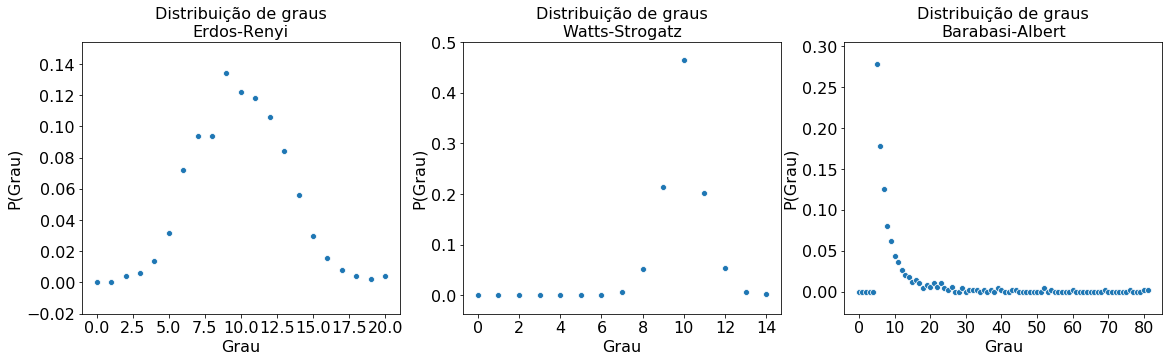

In [4]:
def set_ax_fontsize(ax, fontsize):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    [tick.set_fontsize(fontsize) for tick in ax.get_xticklabels()];
    [tick.set_fontsize(fontsize) for tick in ax.get_yticklabels()];

fig, axis = plt.subplots(1,3, figsize=(8,5))

k_er, pk_er = degree_distribution(er)
plt.subplots_adjust(right=2)
axis[0].set_xlabel('Grau')
axis[0].set_ylabel('P(Grau)')
axis[0].set_title('Distribuição de graus\nErdos-Renyi')
set_ax_fontsize(axis[0], 16)
sns.scatterplot(x=k_er, y=pk_er, ax=axis[0])

k_ws, pk_ws = degree_distribution(ws)
axis[1].set_xlabel('Grau')
axis[1].set_ylabel('P(Grau)')
axis[1].set_title('Distribuição de graus\nWatts-Strogatz')
set_ax_fontsize(axis[1], 16)
sns.scatterplot(x=k_ws, y=pk_ws, ax=axis[1]);

k_ba, pk_ba = degree_distribution(ba)
axis[2].set_xlabel('Grau')
axis[2].set_ylabel('P(Grau)')
axis[2].set_title('Distribuição de graus\nBarabasi-Albert')
set_ax_fontsize(axis[2], 16)
sns.scatterplot(x=k_ba, y=pk_ba, ax=axis[2]);

## Exercício 2

In [5]:
ex2 = pd.Series()
for k in np.arange(0, 5, 0.05):
    n = 500
    p = k/(n-1)
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
    ex2.loc[k] = len(giant_comp)/n

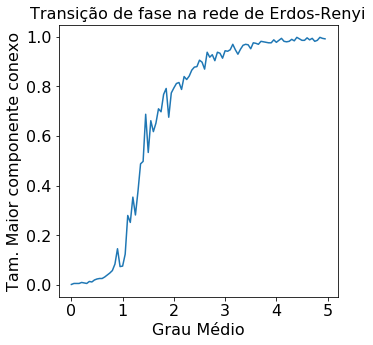

In [6]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex2.index, y=ex2, ax=axis)
axis.set_title('Transição de fase na rede de Erdos-Renyi')
axis.set_xlabel('Grau Médio')
axis.set_ylabel('Tam. Maior componente conexo')
set_ax_fontsize(axis, 16)

In [53]:
ex2 = pd.DataFrame(columns=['N','k','Avg.Short.Path', 'Real diameter', 'Predicted Diameter'])
for k in [4, 10, 20, 30]:
    for n in range(100, 500, 10):
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        short = nx.average_shortest_path_length(giant_comp)
        dmax = nx.diameter(giant_comp)
        avg_deg = len(giant_comp)/giant_comp.number_of_edges()
        diam = np.abs(np.log(len(giant_comp))/np.log(avg_deg))#Tem que tirar o valor absoluto aqui?
        ex2.loc[ex2.shape[0]] = [n, k, short, dmax, diam]
ex2

,N,k,Avg.Short.Path,Real diameter,Predicted Diameter
0,100.0,4.0,3.377867,7.0,6.472859
1,110.0,4.0,3.405029,8.0,6.246221
2,120.0,4.0,3.480950,7.0,6.423053
3,130.0,4.0,3.595325,8.0,6.822306
4,140.0,4.0,3.841849,10.0,7.465593
...,...,...,...,...,...
155,450.0,30.0,2.057342,3.0,2.256823
156,460.0,30.0,2.064242,3.0,2.264923
157,470.0,30.0,2.075480,3.0,2.275359
158,480.0,30.0,2.079019,3.0,2.278272


In [117]:
'''fig, axis = plt.subplots(1,4, figsize=(8,4))
plt.subplots_adjust(right=2.9)

k_4 = ex2[ex2['k']==4]
sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis[0]);
axis[0].set_title('Tam. Médio do caminho mais curto\nk=4')

k_10 = ex2[ex2['k'] == 10]
sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis[1]);
axis[1].set_title('Tam. Médio do caminho mais curto\nk=10')

k_20 = ex2[ex2['k'] == 20]
sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis[2])
axis[2].set_title('Tam. Médio do caminho mais curto\nk=20')

k_30 = ex2[ex2['k'] == 30]
sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis[3])
axis[3].set_title('Tam. Médio do caminho mais curto\nk=30')

for ax in axis:
    set_ax_fontsize(ax, 18)''';

Text(0.5, 1.0, 'Diâmetro\nk=30')

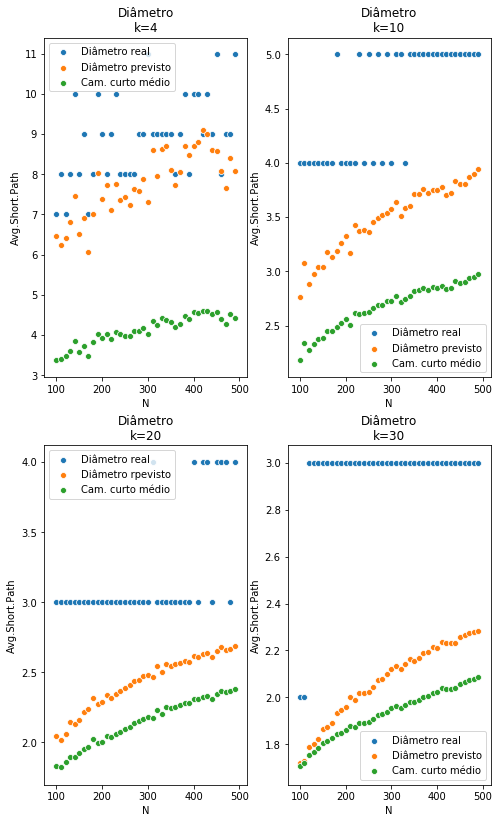

In [56]:
fig, axis = plt.subplots(2,2, figsize=(8,5))
plt.subplots_adjust(top=2.2)

sns.scatterplot(x=k_4['N'], y=k_4['Real diameter'], ax=axis[0,0], label='Diâmetro real');
sns.scatterplot(x=k_4['N'], y=k_4['Predicted Diameter'], ax=axis[0,0], label='Diâmetro previsto')
sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis[0,0], label='Cam. curto médio');

axis[0,0].set_title('Diâmetro\nk=4')

sns.scatterplot(x=k_10['N'], y=k_10['Real diameter'], ax=axis[0,1], label='Diâmetro real');
sns.scatterplot(x=k_10['N'], y=k_10['Predicted Diameter'], ax=axis[0,1], label='Diâmetro previsto')
sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis[0,1], label='Cam. curto médio');
axis[0,1].set_title('Diâmetro\nk=10')

sns.scatterplot(x=k_20['N'], y=k_20['Real diameter'], ax=axis[1,0], label='Diâmetro real')
sns.scatterplot(x=k_20['N'], y=k_20['Predicted Diameter'], ax=axis[1,0], label='Diâmetro rpevisto')
sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis[1,0], label='Cam. curto médio')
axis[1,0].set_title('Diâmetro\nk=20')

sns.scatterplot(x=k_30['N'], y=k_30['Real diameter'], ax=axis[1,1], label='Diâmetro real')
sns.scatterplot(x=k_30['N'], y=k_30['Predicted Diameter'], ax=axis[1,1], label='Diâmetro previsto')
sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis[1,1], label='Cam. curto médio')
axis[1,1].set_title('Diâmetro\nk=30')

## Exercício 3

In [95]:
ex3_ws = pd.DataFrame(columns=['p','Mean vertex-vertex distance','Clustering','Variance'])
n = 100
k = 5
for index, p in enumerate(np.arange(0, 1, 0.001)):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    mean_dist = nx.average_shortest_path_length(ws)
    clust = nx.average_clustering(ws)
    var = moment_of_degree_distribution(ws, 2)
    ex3_ws.loc[index] = [p, mean_dist, clust, var]
ex3_ws

,p,Mean vertex-vertex distance,Clustering,Variance
0,0.000,12.878788,0.500000,16.00
1,0.001,12.878788,0.500000,16.00
2,0.002,12.311515,0.496333,16.02
3,0.003,12.878788,0.500000,16.00
4,0.004,10.182626,0.489667,16.02
...,...,...,...,...
995,0.995,3.454747,0.035000,18.10
996,0.996,3.464646,0.045921,17.46
997,0.997,3.486061,0.033659,17.84
998,0.998,3.531111,0.048024,17.72


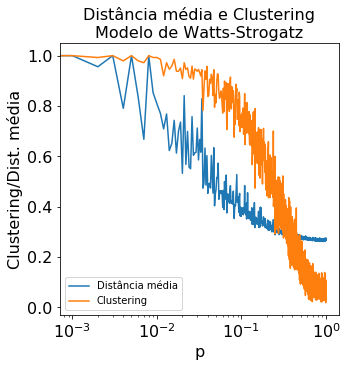

In [100]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
dist = ex3_ws['Mean vertex-vertex distance']
dist = dist/dist.max()
cluster = ex3_ws['Clustering']
cluster = cluster/cluster.max()
sns.lineplot(x=ex3_ws['p'], y=dist, ax=axis, label='Distância média')
graph = sns.lineplot(x=ex3_ws['p'], y=cluster, ax=axis, label='Clustering')
graph.set(xscale='log')
axis.set_title('Distância média e Clustering\nModelo de Watts-Strogatz')
axis.set_ylabel('Clustering/Dist. média')
set_ax_fontsize(axis, 16)

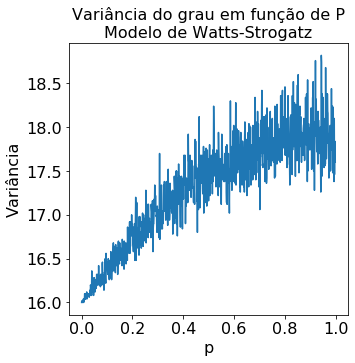

In [102]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex3_ws['p'], y=ex3_ws['Variance'], ax=axis)
axis.set_title('Variância do grau em função de P\nModelo de Watts-Strogatz')
axis.set_ylabel('Variância')
set_ax_fontsize(axis, 16)

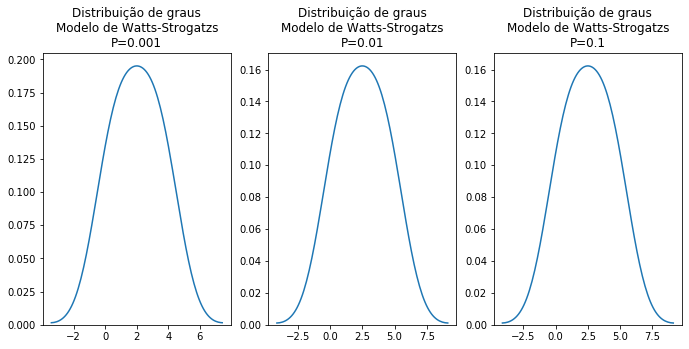

In [115]:
fig, axis = plt.subplots(1,3, figsize=(5,5))
plt.subplots_adjust(right=1.9)

n = 100
k = 5
for index, p in enumerate([0.001, 0.01, 0.1]):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    degrees, _ = degree_distribution(ws)
    axis[index].set_title('Distribuição de graus\nModelo de Watts-Strogatzs\nP={}'.format(p))
    sns.distplot(degrees, ax=axis[index], hist=False)

In [162]:
#Perguntar quem é <d> neste exercício
ex3_lat = pd.DataFrame(columns=['Avg.Dist.1D','Avg.Dist.2D','Avg.Dist.3D','Avg.Dist.Random Net'])
n = 1

for n in range(50,1000,50):
    dims = np.array([n])
    grid_1d = nx.generators.lattice.grid_graph(dims)    
    
    dims = [int(n**(1/2)), int(n**(1/2))]
    grid_2d = nx.generators.lattice.grid_graph(dims)
    
    dims = [int(n**(1/3)), int(n**(1/3)), int(n**(1/3))]
    grid_3d = nx.generators.lattice.grid_graph(dims)
    
    er_0001 = nx.gnp_random_graph(n=n, p=0.001, seed=None, directed=False)
    er_001 = nx.gnp_random_graph(n=n, p=0.01, seed=None, directed=False)
    er_01 = nx.gnp_random_graph(n=n, p=0.1, seed=None, directed=False)
    er_1 = nx.gnp_random_graph(n=n, p=1, seed=None, directed=False)

    giant_comp_01 = sorted(nx.connected_component_subgraphs(er_01), key = len, reverse=True)[0]
    
    
    
    dist_1d = nx.diameter(grid_1d)
    dist_2d = nx.diameter(grid_2d)
    dist_3d = nx.diameter(grid_3d)
    dist_rand = nx.diameter(giant_comp)
    #avg_1d = len(grid_1d)/grid_1d.number_of_edges()
    #avg_2d = len(grid_2d)/grid_1d.number_of_edges()
    #avg_3d = len(grid_3d)/grid_1d.number_of_edges()
    ex3_lat.loc[n] = [dist_1d, dist_2d, dist_3d, dist_rand]

ex3_lat = ex3_lat.astype('int32')
ex3_lat

,Avg.Dist.1D,Avg.Dist.2D,Avg.Dist.3D,Avg.Dist.Random Net
50,49,12,6,1
100,99,18,9,1
150,149,22,12,1
200,199,26,12,1
250,249,28,15,1
300,299,32,15,1
350,349,34,18,1
400,399,38,18,1
450,449,40,18,1
500,499,42,18,1


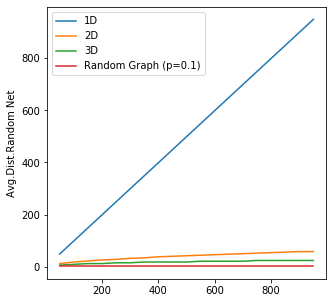

In [163]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
#ex3_lat['Avg.Dist.1D']
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.1D'], ax=axis, label='1D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.2D'], ax=axis, label='2D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.3D'], ax=axis, label='3D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.Random Net'], ax=axis, label='Random Graph (p=0.1)')